# Exploratory Data Analysis of Bank Stocks

In this data project the focus is on exploratory data analysis of stock prices. 
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [7]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Using API to get the stock data from Jan 1st 2006 to Jan 1st 2016 for the following banks:
    
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [9]:
from datetime import datetime
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

In [11]:
#Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [14]:
#Creating a list of the ticker symbols (as strings)
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'] 

In [13]:
#Creating a single dataframe by concatenating all the bank stocks info 
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers) 
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04  39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05  39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06  39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09  39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04  411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05  408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06  409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09  407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04  38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05  38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06  38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09  38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

                                   
              Close        Volume  
Date                               
2006-01-03  23.1060  1.520929e+07  
2006-01-04  22.8378  1.500717e+07  
2006-01-05  22.8150  1.398718e+07  
2006-01-06  22.9451  1.160232e+07  
2006-01-09  22.9451  7.758446e+06  

[5 rows x 30 columns]

In [16]:
#Using Multi-level Indexing to store data in dataframe
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05   39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06   39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09   39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05   408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06   409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09   407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05   38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06   38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09   38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  
2006-01-05   22.8150  1.398718e+07  
2006-01-06   22.9451  1.160232e+07  
2006-01-09   22.9451  7.758446e+06  

[5 rows x 30 columns]

# EDA : EXPLORATORY DATA ANALYSIS

**The max Close price for each bank's stock throughout the time period:**

In [18]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     46.4714
C      472.2140
GS     205.0270
JPM     57.6748
MS      59.1303
WFC     47.3958
dtype: float64

**Creating a DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

( ( Price at current date ) / ( Price at previous date ) - 1 )

In [20]:
#Return - The money made or lost on an investment over some period of time
returns = pd.DataFrame()

In [21]:
df = pd.read_pickle('all_banks')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

**Using pandas pct_change() method on the Close column to create a column representing this return value**

In [22]:
for tick in tickers:
    returns[tick + ' Return'] = df[tick]['Close'].pct_change()

returns = returns.T.drop_duplicates().T

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Using Pairplot to analyze the behaviour of bank stocks**

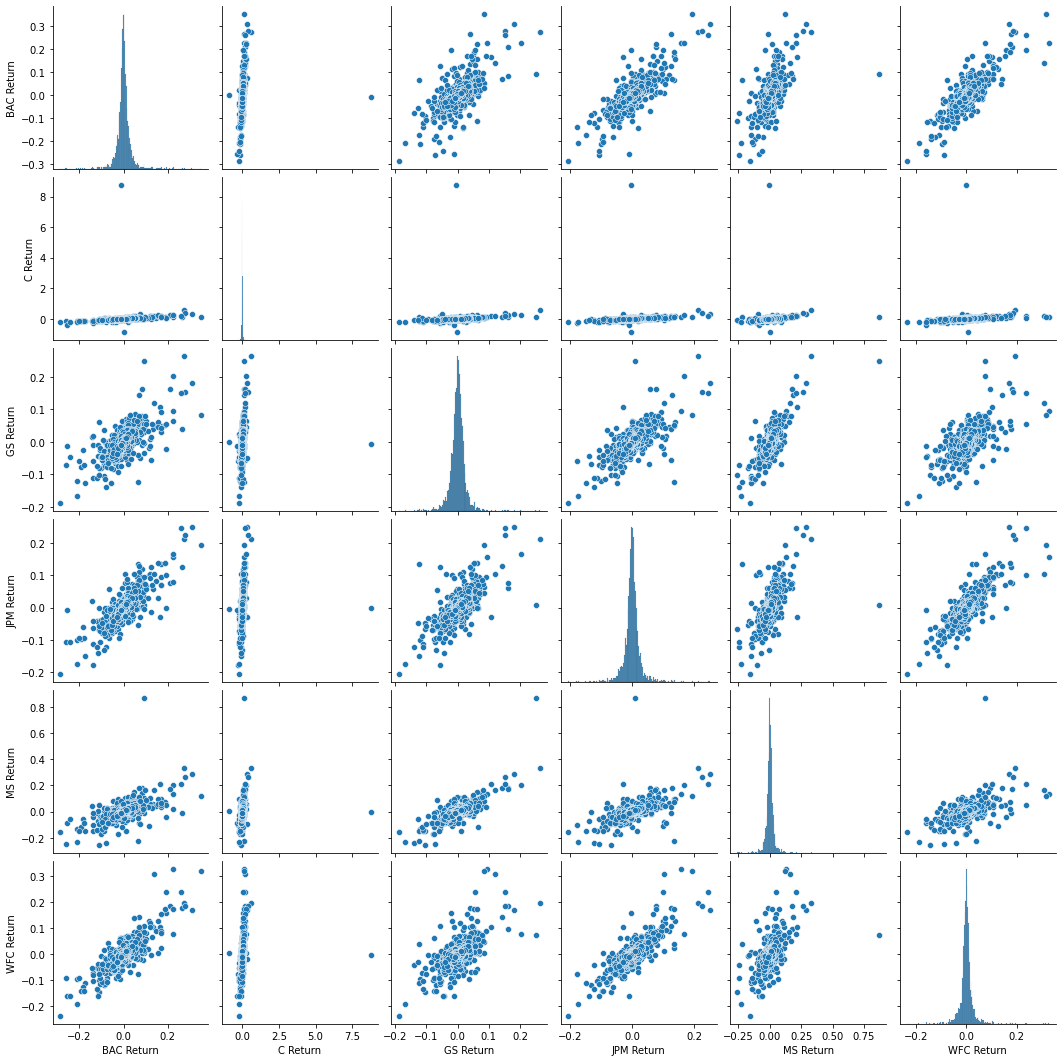

In [24]:
sns.pairplot(data=returns[1:])

**Citigroup had a huge stock crash in 2008 due to global financial crisis. That is why the graph is abnormal for Citigroup**

**The dates on which each bank stock had the best and worst single day returns:**

In [27]:
#Worst Drop
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another. This is because Citigroup Announced Reverse Stock Split in this period**

In [28]:
#Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Using standard deviation on the returns to classify which stock would be the riskiest over the entire time period**

In [29]:
#Basic measurement of riskiness of a stock is standard deviation
#large standard deviation means the stock is going up and down a lot
#low standard deviation means the stock is steady
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Citigroup has higher deviation as compared to others, therefore it can be classified as riskiest


# Visualization

**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley**

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

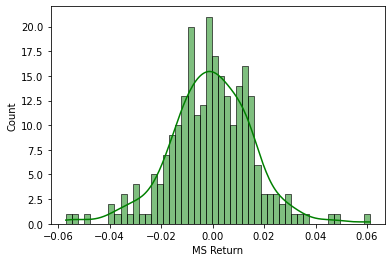

In [33]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50, kde=True)

#percent returns only deviate 0.06 from the avg

**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley**

<AxesSubplot:xlabel='C Return', ylabel='Count'>

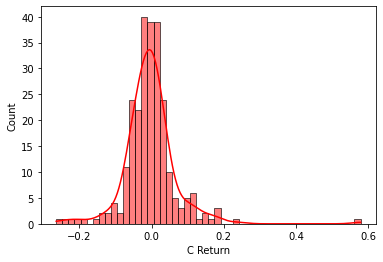

In [34]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],kde=True, color='red', bins=50)

#standard deviation is stretched out from the average(look at 0.6, it is far away from other data)

In [35]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time.**

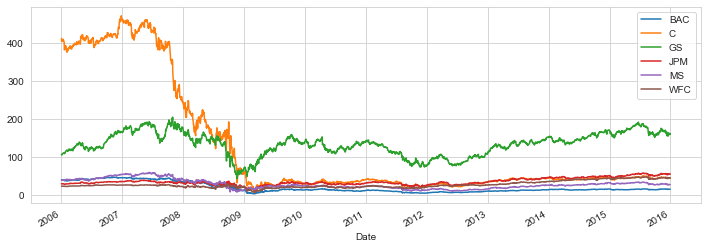

In [36]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

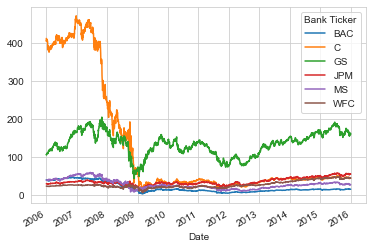

In [37]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [38]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Rolling just means you are taking the average of the previous 30 values at each time point (which is why the first 30 are blank)

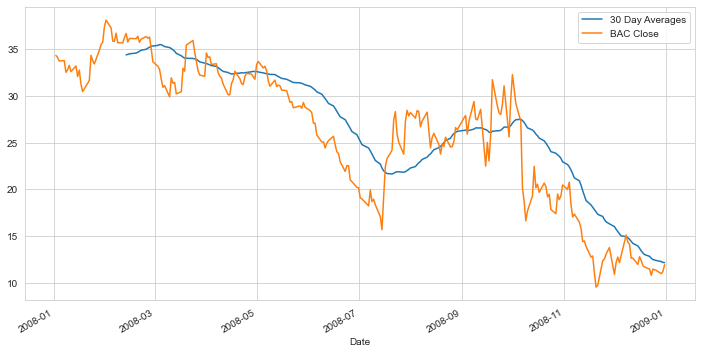

In [39]:
plt.figure(figsize=(12,6))

bank_stocks['BAC']['Close']['2008'].rolling(window=30).mean().plot(label='30 Day Averages')

bank_stocks['BAC']['Close']['2008'].plot(label='BAC Close')

plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

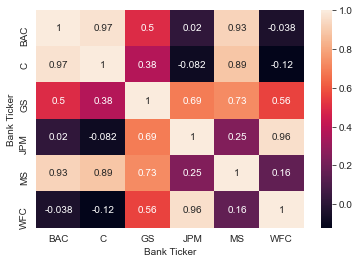

In [40]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

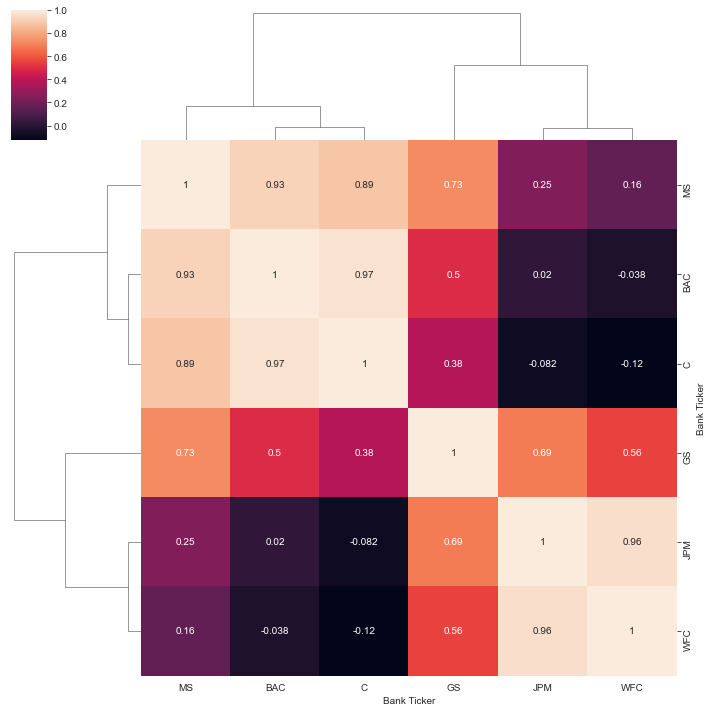

In [41]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

JP Morgan and Wells Fargo are correlated with each other
Morgan Stanley, Bank of America and Citigroup are correlated with each other(since their closing prices are close to each other)